# Spatio-temporal analysis

In [1]:
import pylandstats as pls

We are often interested in the analysis of the temporal evolution of the configuration and composition of a particular landscape. To this end, we can use the class `SpatioTemporalAnalysis`, which we can instantiate with a temporally-ordered sequence of landscape snapshots.

In this case, we will use the three extracts of the Canton of Vaud from the [CORINE Land Cover datasets](https://land.copernicus.eu/pan-european/corine-land-cover) for the years 2000, 2006 and 2012.

In [2]:
input_filepaths = [
    '../data/clc/vaud_g100_clc00_V18_5.tif',
    '../data/clc/vaud_g100_clc06_V18_5a.tif',
    '../data/clc/vaud_g100_clc12_V18_5a.tif'
]

sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=[2000, 2006, 2012])

## Spatio-temporal data frames

By now, `SpatioTemporalAnalysis` only supports class and landscape-level metrics, which can be computed by means of its methods `compute_class_metrics_df` and `compute_landscape_metrics_df` respectively. For instance, a data frame of the class-level metrics can be obtained as follows:

In [3]:
class_metrics_df = sta.compute_class_metrics_df()
class_metrics_df.head()

metric           total_area  proportion_of_landscape  number_of_patches  \
class_val dates                                                           
1         2000      24729.0                 7.701939              193.0   
          2006      24599.0                 7.661450              200.0   
          2012      24766.0                 7.713463              201.0   
2         2000     296346.0                92.298061               13.0   
          2006     296476.0                92.338550                8.0   

metric           patch_density  largest_patch_index  total_edge  edge_density  \
class_val dates                                                                 
1         2000        0.060111             2.069921   1431600.0      4.458771   
          2006        0.062291             2.022269   1436000.0      4.472475   
          2012        0.062602             2.022269   1445900.0      4.503309   
2         2000        0.004049            89.451374   1431600.0      4.458771   
          2006        0.002492            89.131823   1436000.0      4.472475   

metric           landscape_shape_index  effective_mesh_size       area_mn  \
class_val dates                                                             
1         2000               22.949206           169.574514    128.129534   
          2006               23.089172           155.620852    122.995000   
          2012               23.180952           155.770004    123.213930   
2         2000               10.053260        257139.077804  22795.846154   
          2006               10.074380        255311.195671  37059.500000   

metric           ...  fractal_dimension_md  fractal_dimension_ra  \
class_val dates  ...                                               
1         2000   ...              1.081665              0.200096   
          2006   ...              1.080760              0.195545   
          2012   ...              1.079173              0.195545   
2         2000   ...              1.069990              0.206571   
          2006   ...              1.087916              0.194132   

metric           fractal_dimension_sd  fractal_dimension_cv  \
class_val dates                                               
1         2000               0.035772              3.298134   
          2006               0.035250              3.251775   
          2012               0.034800              3.209637   
2         2000               0.056823              5.322120   
          2006               0.054895              5.018827   

metric           euclidean_nearest_neighbor_mn  euclidean_nearest_neighbor_am  \
class_val dates                                                                 
1         2000                     1023.354950                     707.998485   
          2006                     1003.278185                     703.960301   
          2012                     1005.065677                     703.368299   
2         2000                      246.645899                     202.442542   
          2006                      239.112378                     202.435580   

metric           euclidean_nearest_neighbor_md  euclidean_nearest_neighbor_ra  \
class_val dates                                                                 
1         2000                      781.024968                    6772.087205   
          2006                      721.110255                    6772.087205   
          2012                      728.010989                    6772.087205   
2         2000                      223.606798                     116.227766   
          2006                      223.606798                     100.000000   

metric           euclidean_nearest_neighbor_sd  euclidean_nearest_neighbor_cv  
class_val dates                                                                
1         2000                      879.913199                      85.983187  
          2006                      883.732360                      88.

Again, we can use the operations of any pandas data frame. For instance, we can get all the metrics for the *urban* class (`class_val` of 1) in 2000

In [4]:
class_metrics_df.loc[(1, 2000)]

metric
total_area                       2.472900e+04
proportion_of_landscape          7.701939e+00
number_of_patches                1.930000e+02
patch_density                    6.011057e-02
largest_patch_index              2.069921e+00
total_edge                       1.431600e+06
edge_density                     4.458771e+00
landscape_shape_index            2.294921e+01
effective_mesh_size              1.695745e+02
area_mn                          1.281295e+02
area_am                          2.201712e+03
area_md                          4.300000e+01
area_ra                          6.645000e+03
area_sd                          5.154485e+02
area_cv                          4.022870e+02
perimeter_mn                     7.491192e+03
perimeter_am                     5.835938e+04
perimeter_md                     4.400000e+03
perimeter_ra                     1.474000e+05
perimeter_sd                     1.329800e+04
perimeter_cv                     1.775152e+02
perimeter_area_ratio_mn    

Similarly, the data frame of landscape metrics can be obtained as follows:

In [5]:
sta.compute_landscape_metrics_df()

metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,area_mn,area_am,...,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,contagion,shannon_diversity_index
dates,,,,,,,,,,,,,,,,,,,,,
2000,321075.0,206.0,0.064159,89.451374,1431600.0,4.458771,9.716931,257308.652318,1558.616505,257308.652318,...,0.037678,3.477259,974.339330,241.380151,700.000000,6772.087205,872.438139,89.541509,73.401770,0.271429
2006,321075.0,208.0,0.064782,89.131823,1436000.0,4.472475,9.736332,255466.816523,1543.629808,255466.816523,...,0.036252,3.343042,973.887192,240.859645,714.108518,6772.087205,878.977491,90.254549,73.462946,0.270422
2012,321075.0,209.0,0.065094,89.091645,1445900.0,4.503309,9.779982,255235.031918,1536.244019,255235.031918,...,0.035837,3.304230,975.746891,241.066300,721.110255,6772.087205,872.972328,89.467088,73.330913,0.271715


### Customizing your spatio-temporal analysis

As within the `Landscape` analysis, we can also choose to compute a subset of metrics by passing them to the `metrics` keyword argument of the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods, as in:

In [6]:
metrics=['proportion_of_landscape', 'edge_density', 'fractal_dimension_am']
sta.compute_class_metrics_df(metrics=metrics)

metric           proportion_of_landscape  edge_density  fractal_dimension_am
class_val dates                                                             
1         2000                  7.701939      4.458771              1.129561
          2006                  7.661450      4.472475              1.123355
          2012                  7.713463      4.503309              1.123473
2         2000                 92.298061      4.458771              1.204003
          2006                 92.338550      4.472475              1.203001
          2012                 92.286537      4.503309              1.203438

At the class-level, we can choose to compute the metrics only for a subset of classes through the `classes` argument. We can simoultaneously choose a subset of metrics as well as a subset of classes by specifying both the `metrics` and `classes` arguments. For instance, we can choose to only compute the above metrics and only for the *urban* class (value of 1):

In [7]:
sta.compute_class_metrics_df(metrics=metrics, classes=[1])

metric           proportion_of_landscape  edge_density  fractal_dimension_am
class_val dates                                                             
1         2000                  7.701939      4.458771              1.129561
          2006                  7.661450      4.472475              1.123355
          2012                  7.713463      4.503309              1.123473

In both the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods, we can also customize how some metrics are computed through the `metrics_kws` argument:

In [8]:
metrics_kws={
    'proportion_of_landscape': {'percent': False},
    'edge_density': {'count_boundary': True}
}
sta.compute_class_metrics_df(
    metrics=metrics, classes=[1], metrics_kws=metrics_kws)

metric           proportion_of_landscape  edge_density  fractal_dimension_am
class_val dates                                                             
1         2000                  0.077019      4.502998              1.129561
          2006                  0.076614      4.516079              1.123355
          2012                  0.077135      4.548470              1.123473

On the other hand, the `dates` keyword argument might also be provided as string or `datetime` objects, e.g.:

In [9]:
import datetime

dates = [datetime.date(year, 1, 1) for year in [2000, 2006, 2012]]
sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=dates)
sta.compute_landscape_metrics_df()

metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,effective_mesh_size,area_mn,area_am,...,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,contagion,shannon_diversity_index
dates,,,,,,,,,,,,,,,,,,,,,
2000-01-01,321075.0,206.0,0.064159,89.451374,1431600.0,4.458771,9.716931,257308.652318,1558.616505,257308.652318,...,0.037678,3.477259,974.339330,241.380151,700.000000,6772.087205,872.438139,89.541509,73.401770,0.271429
2006-01-01,321075.0,208.0,0.064782,89.131823,1436000.0,4.472475,9.736332,255466.816523,1543.629808,255466.816523,...,0.036252,3.343042,973.887192,240.859645,714.108518,6772.087205,878.977491,90.254549,73.462946,0.270422
2012-01-01,321075.0,209.0,0.065094,89.091645,1445900.0,4.503309,9.779982,255235.031918,1536.244019,255235.031918,...,0.035837,3.304230,975.746891,241.066300,721.110255,6772.087205,872.972328,89.467088,73.330913,0.271715


## Plots

One of the most important features of `SpatioTemporalAnalysis` is to plot the evolution of the metrics. We can plot the proportion o landscape occupied by the *urban* class (`class_val` of 1) as in:

<AxesSubplot:ylabel='PLAND'>

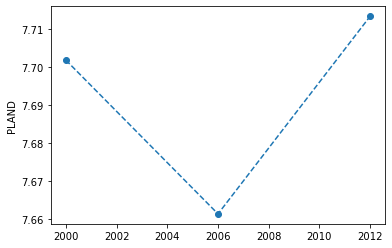

In [10]:
sta.plot_metric('proportion_of_landscape', class_val=1)

If we want to plot the evolution of a metric at the landscape level, we can do so by using the same `plot_metric` method, but without setting the `class_val` argument. Note however that we cannot compute the `proportion_of_landscape` at the landscape level (we could but it makes no sense, the landscape always occupies 100% of the landscape). Similarly, some metrics such as `shannon_diversity_index` cannot be computed at the class level but only at the landscape level. See the documentation of each metric for more details, or [see above](available-metrics) the metrics that can be at each level.

Let's then plot the area-weighted fractal dimension, that is `fractal_dimension_am`, at both the class and landscape level:

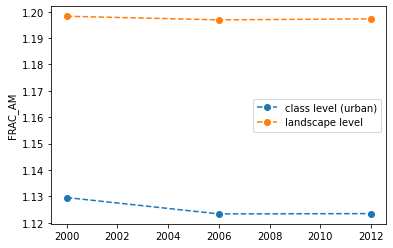

In [11]:
ax = sta.plot_metric('fractal_dimension_am', class_val=1, 
                     plot_kws={'label': 'class level (urban)'})
sta.plot_metric(
    'fractal_dimension_am', ax=ax, plot_kws={'label': 'landscape level'})
ax.legend()

Note that we can pass keyword arguments to matplotlib's `plot` method through the `plt_kws` argument of `plot_metric`. See the documentation of  [SpatioTemporalAnalysis.plot_metric](https://pylandstats.readthedocs.io/en/latest/spatiotemporal.html#pylandstats.SpatioTemporalAnalysis.plot_metric) for more details.

## See also

* [SpatioTemporalBufferAnalysis](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/04-spatiotemporal-buffer-analysis.ipynb)